<div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:300%; font-family:Arial, sans-serif; background-color:#0008ff; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b>🎓 PROYECTO IAA </b></div>

### <div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:50%; font-family:Arial, sans-serif; background-color:#BCE5FB; color:#013D41; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 📚 Importación de librerías</b></div>

In [1]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Modelos de machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


# Métricas de evaluación
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')
sns.set_theme()
pd.set_option('display.max_columns', None)

# <div style="border-radius:15px; padding:15px; margin:0; font-size:100%; font-family:Arial, sans-serif; background-color:#0074ff; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 1. 📊 Análisis EDA </b></div>

In [2]:
df = pd.read_csv('./Student Depression Dataset.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


## <div style="border-radius:15px; padding:15px; margin:0; font-size:70%; font-family:Arial, sans-serif; background-color:#0b835f; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🔶 1.1 Revisión inicial general</b></div>

In [3]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [4]:
df.shape

(27901, 18)

In [5]:
df.dtypes

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

Tenemos un dataset con más de 27k registros y 18 columnas, 17 features y 1 columna target

## <div style="border-radius:15px; padding:15px; margin:0; font-size:70%; font-family:Arial, sans-serif; background-color:#0b835f; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🔶 1.2 Análisis macro por variables</b></div>

In [6]:
def exploracion_inicial(dataframe):
    """
    Explora las columnas de un dataframe y devuelve un resumen detallado de cada una.
    """
    exploration_results = []

    for col in dataframe.columns:
        col_info = {}
        col_info['Column Name'] = col
        col_info['Type'] = dataframe[col].dtype
        col_info['Missing Values'] = dataframe[col].isnull().sum()
        col_info['Missing Percentage'] = (dataframe[col].isnull().sum() / len(dataframe)) * 100
        col_info['Cardinality'] = dataframe[col].nunique()

        # Para variables categóricas
        if not pd.api.types.is_numeric_dtype(dataframe[col]):
            col_info['Most Frequent'] = dataframe[col].value_counts().idxmax()
            col_info['Most Frequent Count'] = dataframe[col].value_counts().max()
            col_info['Binary'] = False  # Las categóricas no son binarias
            col_info['Is Constant'] = dataframe[col].nunique() == 1

        # Para variables numéricas
        if pd.api.types.is_numeric_dtype(dataframe[col]):
            col_info['Mean'] = dataframe[col].mean()
            col_info['Median'] = dataframe[col].median()
            col_info['Standard Deviation'] = dataframe[col].std()
            col_info['Q1'] = dataframe[col].quantile(0.25)
            col_info['Q3'] = dataframe[col].quantile(0.75)
            col_info['IQR'] = col_info['Q3'] - col_info['Q1']
            col_info['Binary'] = dataframe[col].nunique() == 2
            col_info['Is Constant'] = dataframe[col].nunique() == 1

        exploration_results.append(col_info)

    # Convertir los resultados en un DataFrame para visualización fácil
    results_df = pd.DataFrame(exploration_results)
    return results_df

In [7]:
exploracion_inicial(df)

,Column Name,Type,Missing Values,Missing Percentage,Cardinality,Mean,Median,Standard Deviation,Q1,Q3,IQR,Binary,Is Constant,Most Frequent,Most Frequent Count
0,id,int64,0,0.000000,27901,70442.149421,70684.00,40641.175216,35039.00,105818.00,70779.00,False,False,NaN,NaN
1,Gender,object,0,0.000000,2,NaN,NaN,NaN,NaN,NaN,NaN,False,False,Male,15547.0
2,Age,float64,0,0.000000,34,25.822300,25.00,4.905687,21.00,30.00,9.00,False,False,NaN,NaN
3,City,object,0,0.000000,52,NaN,NaN,NaN,NaN,NaN,NaN,False,False,Kalyan,1570.0
4,Profession,object,0,0.000000,14,NaN,NaN,NaN,NaN,NaN,NaN,False,False,Student,27870.0
5,Academic Pressure,float64,0,0.000000,6,3.141214,3.00,1.381465,2.00,4.00,2.00,False,False,NaN,NaN
6,Work Pressure,float64,0,0.000000,3,0.000430,0.00,0.043992,0.00,0.00,0.00,False,False,NaN,NaN
7,CGPA,float64,0,0.000000,332,7.656104,7.77,1.470707,6.29,8.92,2.63,False,False,NaN,NaN
8,Study Satisfaction,float64,0,0.000000,6,2.943837,3.00,1.361148,2.00,4.00,2.00,False,False,NaN,NaN
9,Job Satisfaction,float64,0,0.000000,5,0.000681,0.00,0.044394,0.00,0.00,0.00,False,False,NaN,NaN


### ✅ Contexto General del Dataset

- No hay datos faltantes, salvo 3 registros en **estrés financiero**.
- La columna **target** (Depresión) es **binaria**, ideal para clasificación.
- El dataset contiene datos de **52 ciudades** y **14 profesiones**.
- La mayoría de los encuestados ha tenido **pensamientos suicidas**.
- En promedio, las personas dedican **7.16 horas diarias** al trabajo/estudio.
- Predomina la **ausencia de antecedentes familiares** de enfermedades mentales.
- Hay **más personas con depresión** que sin ella en el dataset.
- La **edad media** de los encuestados es de **casi 26 años**.
- Fueron entrevistados más **hombres que mujeres**.

---

## <div style="border-radius:15px; padding:15px; margin:0; font-size:70%; font-family:Arial, sans-serif; background-color:#0b835f; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🔶 1.3 Análisis detallado por variables: Categóricas</b></div>

In [8]:
# Clasificar columnas en numéricas, categóricas y binarias
categorical = [var for var in df.columns if df[var].dtype == 'object']
numerical = [var for var in df.columns if df[var].dtype in ['int64', 'float64']]
binary = [var for var in numerical if df[var].nunique() == 2]  # Numéricas con solo 2 valores únicos

# Mostrar los resultados
print('Hay {} variables categóricas:'.format(len(categorical)))
print(categorical)
print('\nHay {} variables numéricas:'.format(len(numerical)))
print(numerical)
print('\nHay {} variables binarias:'.format(len(binary)))
print(binary)

Hay 8 variables categóricas:
['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

Hay 10 variables numéricas:
['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']

Hay 1 variables binarias:
['Depression']


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def analisis_columna_profundizado(dataframe, column_name):
    """
    Realiza un análisis más profundo de una columna específica, incluyendo estadísticas descriptivas
    y gráficos, con soporte explícito para variables binarias (dos valores únicos).

    Args:
        dataframe (pd.DataFrame): El DataFrame que contiene la columna.
        column_name (str): El nombre de la columna a analizar.

    Returns:
        None: Genera gráficos y muestra estadísticas descriptivas.
    """
    if column_name not in dataframe.columns:
        raise ValueError(f"La columna '{column_name}' no existe en el DataFrame.")

    col_data = dataframe[column_name]

    print(f"Análisis profundo para la columna: {column_name}")
    print("-" * 50)

    # Tipo de dato y valores nulos
    print(f"Tipo de dato: {col_data.dtype}")
    print(f"Valores nulos: {col_data.isnull().sum()} ({(col_data.isnull().sum() / len(col_data)) * 100:.2f}%)")
    print(f"Cardinalidad: {col_data.nunique()} valores únicos")

    # Análisis para variables binarias (cardinalidad de 2)
    if col_data.nunique() == 2:
        print("\nDistribución de valores binarios:")
        print(col_data.value_counts(normalize=True) * 100)

        # Gráfico de barras para distribución binaria
        plt.figure(figsize=(6, 4))
        sns.countplot(data=dataframe, x=column_name, palette="viridis")
        plt.title(f"Distribución Binaria - {column_name}")
        plt.xlabel(column_name)
        plt.ylabel("Frecuencia")
        plt.show()

    # Análisis para variables numéricas
    elif pd.api.types.is_numeric_dtype(col_data):
        # Estadísticas descriptivas
        print("\nEstadísticas descriptivas:")
        print(col_data.describe())

        # Detección de outliers
        Q1 = col_data.quantile(0.25)
        Q3 = col_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        print(f"Outliers (por debajo): {sum(col_data < lower_bound)}")
        print(f"Outliers (por encima): {sum(col_data > upper_bound)}")

        # Gráficos para análisis numérico
        plt.figure(figsize=(12, 6))

        # Histograma
        plt.subplot(1, 2, 1)
        sns.histplot(col_data, kde=True, bins=30, color='blue')
        plt.title(f"Distribución de {column_name}")
        plt.xlabel(column_name)
        plt.ylabel("Frecuencia")

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(data=col_data, orient='h', color='orange')
        plt.title(f"Boxplot de {column_name}")

        plt.tight_layout()
        plt.show()

    # Análisis para variables categóricas
    elif pd.api.types.is_object_dtype(col_data) or pd.api.types.is_categorical_dtype(col_data):
        print("\nDistribución de categorías:")
        print(col_data.value_counts(normalize=True) * 100)

        # Gráfico de barras
        plt.figure(figsize=(8, 6))
        sns.countplot(data=dataframe, y=column_name, order=col_data.value_counts().index, palette="viridis")
        plt.title(f"Distribución de Categorías - {column_name}")
        plt.xlabel("Frecuencia")
        plt.ylabel(column_name)
        plt.show()


### <div style="border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:rgb(230, 184, 34); color:black; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🟡 1.3.1 Gender </b></div>

Análisis profundo para la columna: Gender
--------------------------------------------------
Tipo de dato: object
Valores nulos: 0 (0.00%)
Cardinalidad: 2 valores únicos

Distribución de valores binarios:
Gender
Male      55.722017
Female    44.277983
Name: proportion, dtype: float64


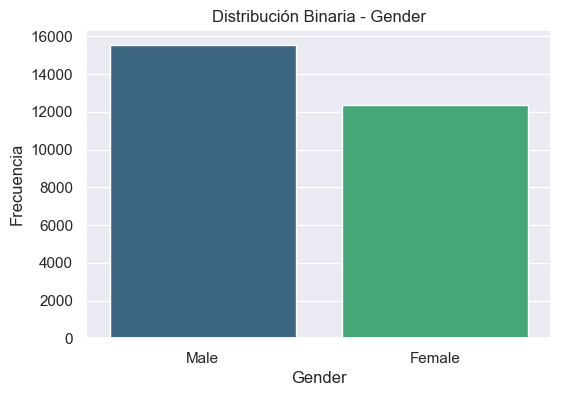

In [10]:
analisis_columna_profundizado(df, 'Gender')

Esta columna se queda tal como está, una vez terminemos el EDA hacemos el encoding.

### <div style="border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:rgb(230, 184, 34); color:black; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🟡 1.3.2 City </b></div>

Análisis profundo para la columna: City
--------------------------------------------------
Tipo de dato: object
Valores nulos: 0 (0.00%)
Cardinalidad: 52 valores únicos

Distribución de categorías:
City
Kalyan                5.627038
Srinagar              4.917386
Hyderabad             4.802695
Vasai-Virar           4.623490
Lucknow               4.139637
Thane                 4.082291
Ludhiana              3.981936
Agra                  3.921006
Surat                 3.863661
Kolkata               3.820652
Jaipur                3.713129
Patna                 3.609190
Visakhapatnam         3.472994
Pune                  3.469410
Ahmedabad             3.408480
Bhopal                3.347550
Chennai               3.171929
Meerut                2.956883
Rajkot                2.924626
Delhi                 2.752590
Bangalore             2.749005
Ghaziabad             2.670155
Mumbai                2.505287
Vadodara              2.487366
Varanasi              2.455109
Nagpur                

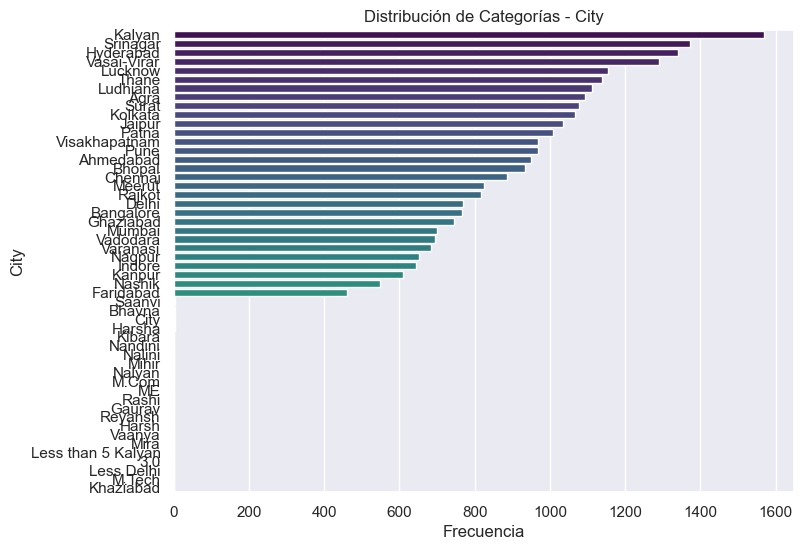

In [11]:
analisis_columna_profundizado(df, 'City')

La cardinalidad de esta columna es muy alta, y la mayoría de las ciudades aparecen muy poco, si lo dejamos tal como está, vamos a tener problemas con un df sparse al hacer el encoding, por lo tanto, vamos a mantener únicamente las 5 ciudades con más apariciones y las demás las dejaremos como ´Others´

In [12]:
top_5_cities = df['City'].value_counts().nlargest(5).index

df['City_simplified'] = df['City'].apply(lambda x: x if x in top_5_cities else 'Others')


In [13]:
print(f"Hay un total de: {df['City_simplified'].value_counts().sum()} registros en la columna nueva")
print(f"Hay un total de: {df['City'].value_counts().sum()} registros en la columna antigua")



Hay un total de: 27901 registros en la columna nueva
Hay un total de: 27901 registros en la columna antigua


Comprobamos la nueva distribución de la columna que creamos

Análisis profundo para la columna: City_simplified
--------------------------------------------------
Tipo de dato: object
Valores nulos: 0 (0.00%)
Cardinalidad: 6 valores únicos

Distribución de categorías:
City_simplified
Others         75.889753
Kalyan          5.627038
Srinagar        4.917386
Hyderabad       4.802695
Vasai-Virar     4.623490
Lucknow         4.139637
Name: proportion, dtype: float64


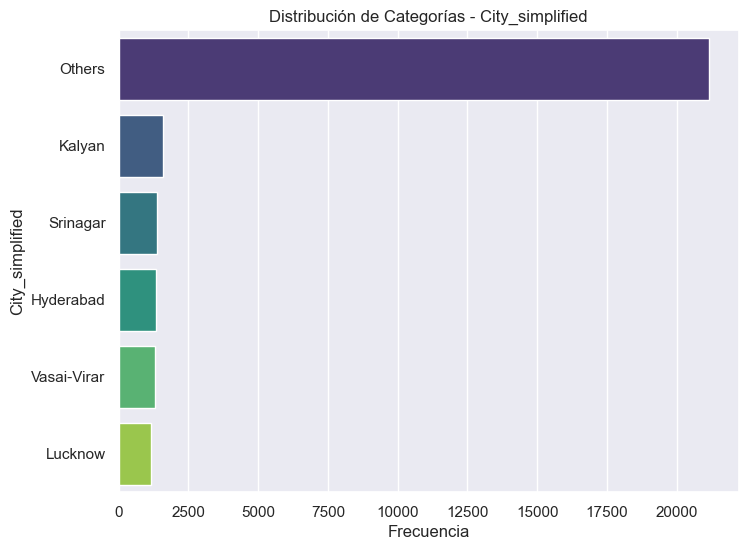

In [14]:
analisis_columna_profundizado(df, 'City_simplified')

Eliminamos la columna original que ya no nos sirve. 

In [15]:
df.drop(columns= 'City', inplace = True)

### <div style="border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:rgb(230, 184, 34); color:black; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🟡 1.3.3 Profession </b></div>

Análisis profundo para la columna: Profession
--------------------------------------------------
Tipo de dato: object
Valores nulos: 0 (0.00%)
Cardinalidad: 14 valores únicos

Distribución de categorías:
Profession
Student                   99.888893
Architect                  0.028673
Teacher                    0.021505
Digital Marketer           0.010752
Content Writer             0.007168
Chef                       0.007168
Doctor                     0.007168
Pharmacist                 0.007168
Civil Engineer             0.003584
UX/UI Designer             0.003584
Educational Consultant     0.003584
Manager                    0.003584
Lawyer                     0.003584
Entrepreneur               0.003584
Name: proportion, dtype: float64


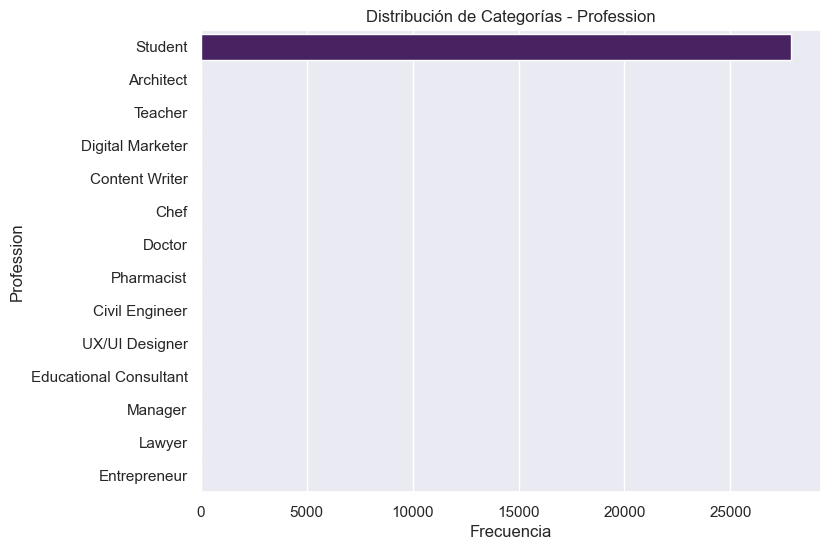

In [16]:
analisis_columna_profundizado(df, 'Profession')

En nuestro caso de negocio, orientamos el modelo inicial hacia una universidad, por ello, filtramos el df para quedarnos solamente con los registros de estudiantes y eliminamos las demás profesiones que representan una muestra mínima. Esto nos ayuda a orientar el caso de negocio y evitar futuro overfitting con profesiones que no aportan valor en el entrenamiento porque su aparición está muy desbalanceada respecto a los estudiantes. 

In [17]:
df = df[df['Profession'] == 'Student'].copy()


In [18]:
df['Profession'].value_counts()


Profession
Student    27870
Name: count, dtype: int64

Como la columna ya está filtrada y nos quedamos con un df únicamente de estudiantes, eliminamos esta columna que ya no aporta información, es una constante. 

In [19]:
df.drop (columns = 'Profession', inplace = True)

### <div style="border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:rgb(230, 184, 34); color:black; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🟡 1.3.4 Sleep duration </b></div>

Análisis profundo para la columna: Sleep Duration
--------------------------------------------------
Tipo de dato: object
Valores nulos: 0 (0.00%)
Cardinalidad: 5 valores únicos

Distribución de categorías:
Sleep Duration
Less than 5 hours    29.791891
7-8 hours            26.325798
5-6 hours            22.163617
More than 8 hours    21.654108
Others                0.064586
Name: proportion, dtype: float64


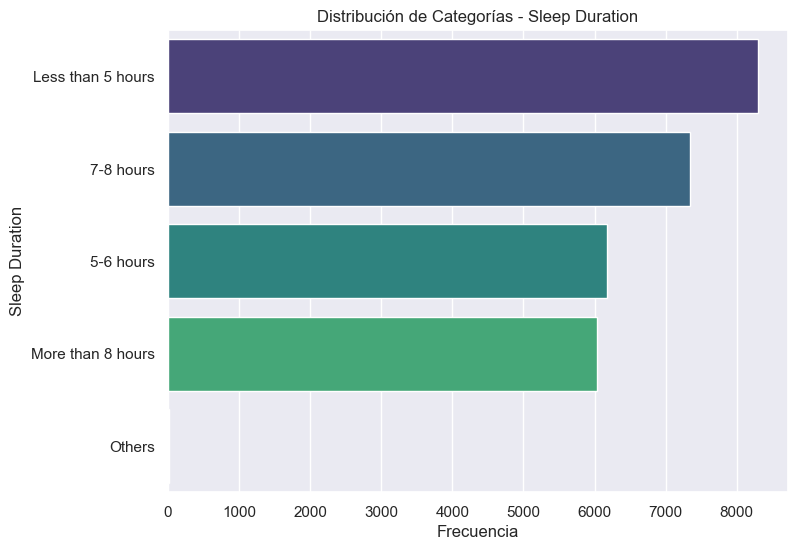

In [20]:
analisis_columna_profundizado(df, 'Sleep Duration')

Esta columna solamente vamos a cambiar 'Others' a Nan, ya que su proporción es muy baja. La cambiamos a Nan ahora en la limpieza por si más adelante queremos imputar con la moda sea más fácil. No eliminamos los registros porque perderíamos información de filas completas, que no queremos. 

In [21]:
df['Sleep Duration'] = df['Sleep Duration'].replace('Others', np.nan)


### <div style="border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:rgb(230, 184, 34); color:black; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🟡 1.3.5 Dietary Habits </b></div>

Análisis profundo para la columna: Dietary Habits
--------------------------------------------------
Tipo de dato: object
Valores nulos: 0 (0.00%)
Cardinalidad: 4 valores únicos

Distribución de categorías:
Dietary Habits
Unhealthy    36.989595
Moderate     35.557948
Healthy      27.409401
Others        0.043057
Name: proportion, dtype: float64


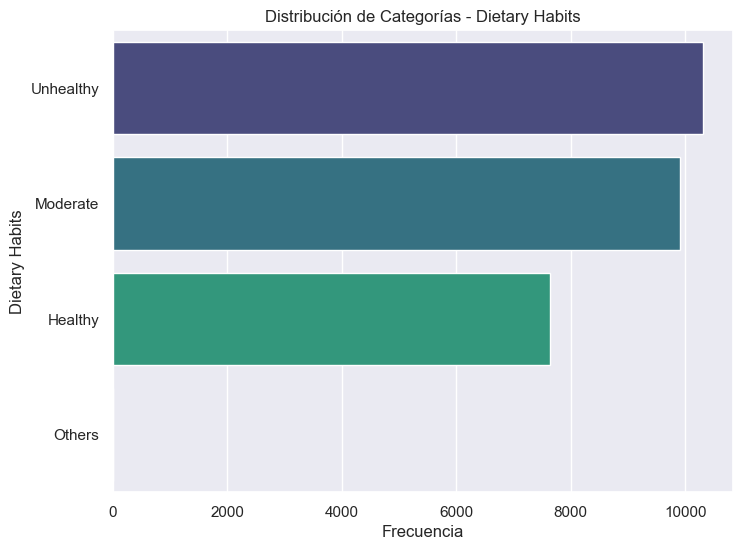

In [22]:
analisis_columna_profundizado(df,'Dietary Habits')

Nuevamente, cambiamos Others por Nan por si imputamos por la moda más adelante

In [23]:
df['Dietary Habits'] = df['Dietary Habits'].replace('Others', np.nan)

### <div style="border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:rgb(230, 184, 34); color:black; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🟡 1.3.6 Deegree </b></div>

Análisis profundo para la columna: Degree
--------------------------------------------------
Tipo de dato: object
Valores nulos: 0 (0.00%)
Cardinalidad: 28 valores únicos

Distribución de categorías:
Degree
Class 12    21.815572
B.Ed         6.688195
B.Com        5.403660
B.Arch       5.299605
BCA          5.138141
MSc          4.255472
B.Tech       4.133477
MCA          3.738787
M.Tech       3.667025
BHM          3.308217
BSc          3.175457
M.Ed         2.945820
B.Pharm      2.902763
M.Com        2.630068
MBBS         2.493721
BBA          2.493721
LLB          2.407607
BE           2.195910
BA           2.149264
M.Pharm      2.084679
MD           2.041622
MBA          2.016505
MA           1.944743
PhD          1.869394
LLM          1.725870
MHM          0.685325
ME           0.663796
Others       0.125583
Name: proportion, dtype: float64


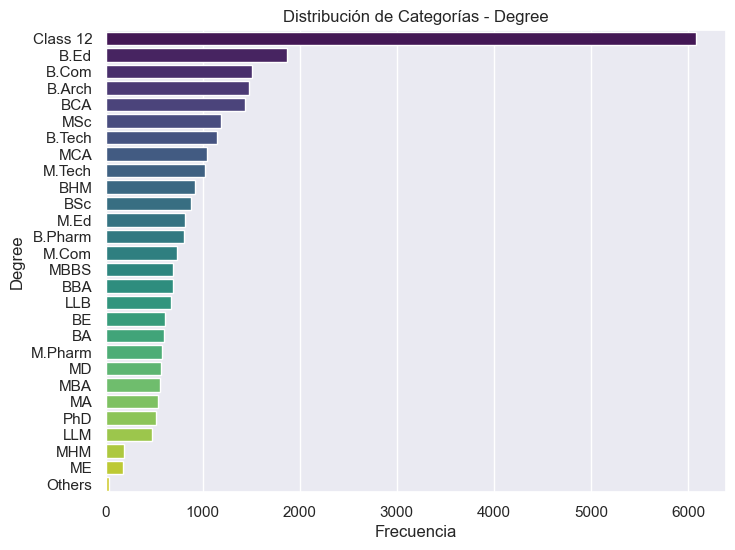

In [24]:
analisis_columna_profundizado(df, 'Degree')

Vamos a hacer el mismo tratamiento que la columa de ciudad, para evitar una matriz sparse más adelante

Dejamos las primeras 5 y las demás las ponemos como Others

In [25]:
top_degrees = df['Degree'].value_counts().nlargest(5).index
df['Degree'] = df['Degree'].apply(lambda x: x if x in top_degrees else 'Others')
#Después vamos a verificar otra vez con nuestra función de análisis de columna

Análisis profundo para la columna: Degree
--------------------------------------------------
Tipo de dato: object
Valores nulos: 0 (0.00%)
Cardinalidad: 6 valores únicos

Distribución de categorías:
Degree
Others      55.654826
Class 12    21.815572
B.Ed         6.688195
B.Com        5.403660
B.Arch       5.299605
BCA          5.138141
Name: proportion, dtype: float64


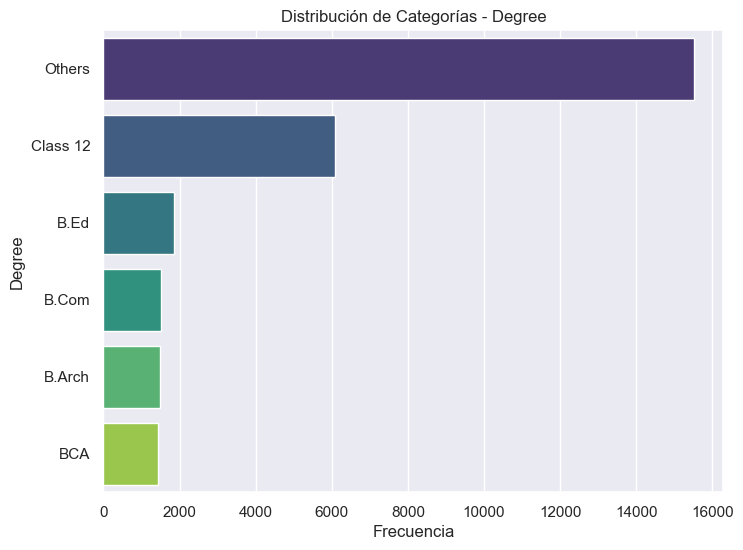

In [26]:
analisis_columna_profundizado(df, 'Degree')

### <div style="border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:rgb(230, 184, 34); color:black; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🟡 1.3.7 Suicidal thoughts </b></div>

Análisis profundo para la columna: Have you ever had suicidal thoughts ?
--------------------------------------------------
Tipo de dato: object
Valores nulos: 0 (0.00%)
Cardinalidad: 2 valores únicos

Distribución de valores binarios:
Have you ever had suicidal thoughts ?
Yes    63.261572
No     36.738428
Name: proportion, dtype: float64


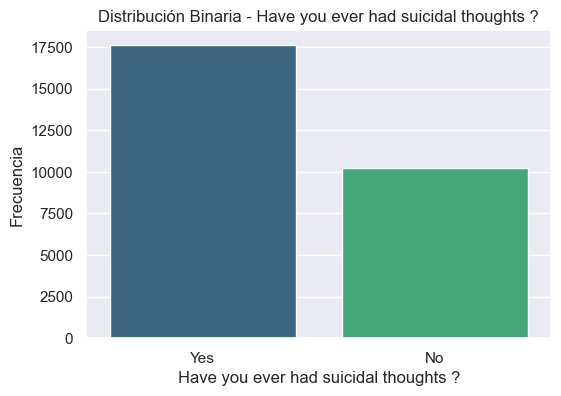

In [27]:
analisis_columna_profundizado(df, 'Have you ever had suicidal thoughts ?')

In [28]:
pd.crosstab(df['Have you ever had suicidal thoughts ?'], df['Depression'], normalize='index') * 100


Depression,0,1
Have you ever had suicidal thoughts ?,,
No,76.814142,23.185858
Yes,20.968748,79.031252


Vamos a dejar esta variable, será muy fuerte como predictora pero no esperamso que en el negocio todos los que quieran usar nuestro modelo vayan a tener esta info. por lo que haremos modelos con y sin esta feature para evaluar el desempeño en cada caso

### <div style="border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:rgb(230, 184, 34); color:black; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🟡 1.3.8 Family mental illness  </b></div>

Análisis profundo para la columna: Family History of Mental Illness
--------------------------------------------------
Tipo de dato: object
Valores nulos: 0 (0.00%)
Cardinalidad: 2 valores únicos

Distribución de valores binarios:
Family History of Mental Illness
No     51.611051
Yes    48.388949
Name: proportion, dtype: float64


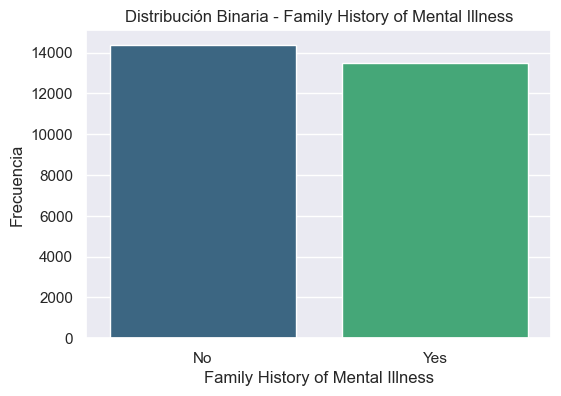

In [29]:
analisis_columna_profundizado(df,'Family History of Mental Illness' )

In [30]:
df.head()

,id,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,City_simplified
0,2,Male,33.0,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,Others,Yes,3.0,1.0,No,1,Others
1,8,Female,24.0,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,Others,No,3.0,2.0,Yes,0,Others
2,26,Male,31.0,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,Others,No,9.0,1.0,Yes,0,Srinagar
3,30,Female,28.0,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1,Others
4,32,Female,25.0,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,Others,Yes,1.0,1.0,No,0,Others


Esta variable se queda tal como está.

## <div style="border-radius:15px; padding:15px; margin:0; font-size:70%; font-family:Arial, sans-serif; background-color:#0b835f; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🔶 1.3 Análisis detallado por variables: Numéricas</b></div>

### <div style="border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:rgb(230, 184, 34); color:black; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🟡 1.3.9 ID </b></div>

## <div style="border-radius:15px; padding:15px; margin:0; font-size:70%; font-family:Arial, sans-serif; background-color:#0b835f; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🔶 2.2. SUBTITULLOOOO</b></div>

### <div style="border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:rgb(230, 184, 34); color:black; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🟡 2.2.1. SUB-SUBTITULOO (FB) </b></div>

# <div style="border-radius:15px; padding:15px; margin:0; font-size:100%; font-family:Arial, sans-serif; background-color:#0074ff; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 2. 📊 Entrenamiento de modelos </b></div>

# <div style="border-radius:15px; padding:15px; margin:0; font-size:100%; font-family:Arial, sans-serif; background-color:#0074ff; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 3. 📊 Resultados y Visualización </b></div>

# <div style="border-radius:15px; padding:15px; margin:0; font-size:100%; font-family:Arial, sans-serif; background-color:#0074ff; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 3. 📊 Historial GIT </b></div>

1. Jorge 23/03 14:30